****
## Import Libraries ##
****

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix


****
## Read Dataset ##
****

In [56]:
df=pd.read_csv("cancer patient data sets.csv")


In [57]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [58]:
df.shape

(1000, 26)

In [59]:
# print first five rows of the dataframe
df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

****
## Data Visualization ##
****

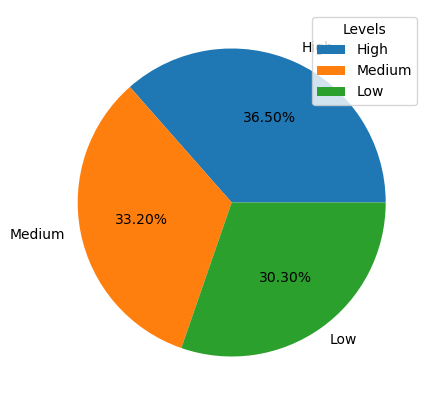

In [61]:
# Count the distribution of the target variable
tdf = df['Level'].value_counts().reset_index()
tdf.columns = ['Level', 'Count']  # Rename columns for clarity

# Plotting the pie chart
plt.figure(figsize=(15, 5))
plt.pie(x=tdf['Count'], labels=tdf['Level'], autopct='%.2f%%')
plt.legend(tdf['Level'], title="Levels")
plt.show()


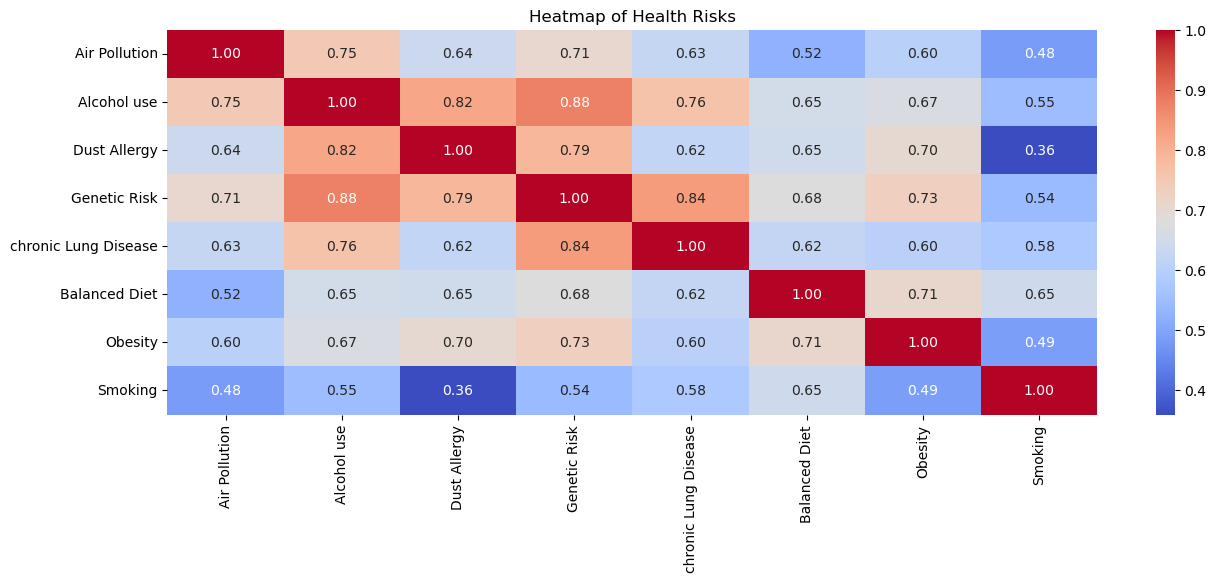

In [62]:
#Let us look how some of the Risk, Allergies and behavious are related to each other
corr=df[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk', 
            'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Health Risks')
plt.show()

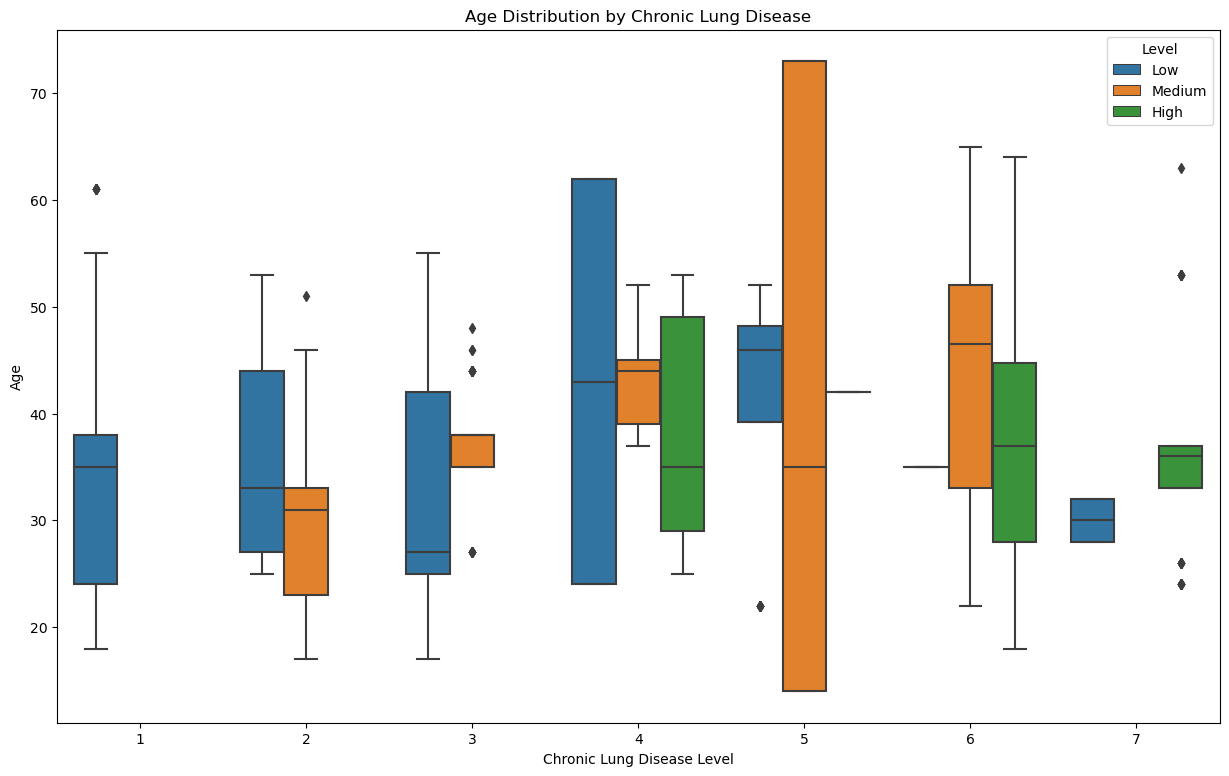

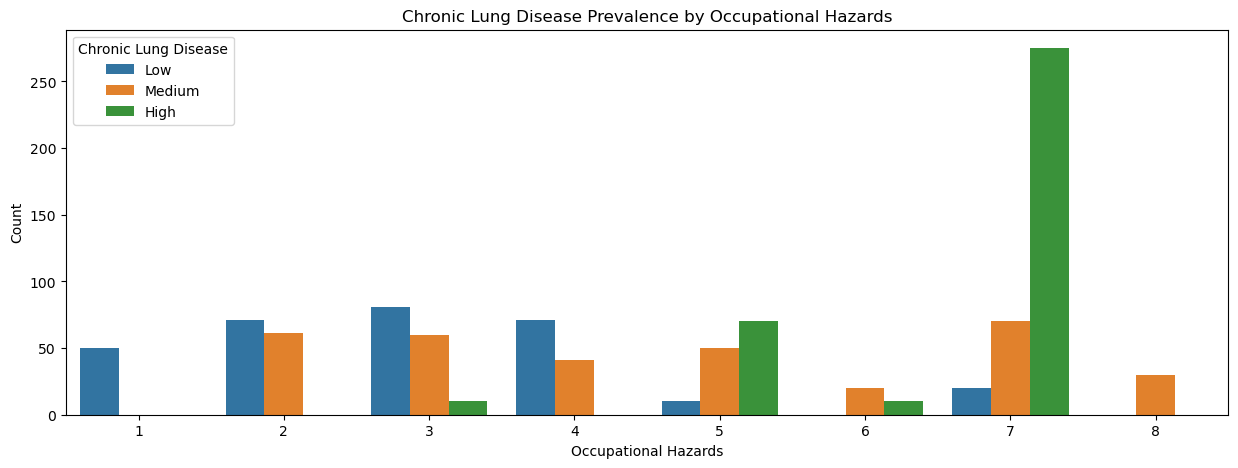

In [63]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=df,x='chronic Lung Disease',y='Age',hue='Level')
plt.title('Age Distribution by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease Level')
plt.ylabel('Age')
plt.show()
plt.figure(figsize=(15, 5))
sns.countplot(data=df,x='OccuPational Hazards',hue='Level')
plt.title('Chronic Lung Disease Prevalence by Occupational Hazards')
plt.xlabel('Occupational Hazards')
plt.ylabel('Count')
plt.legend(title='Chronic Lung Disease')
plt.show()

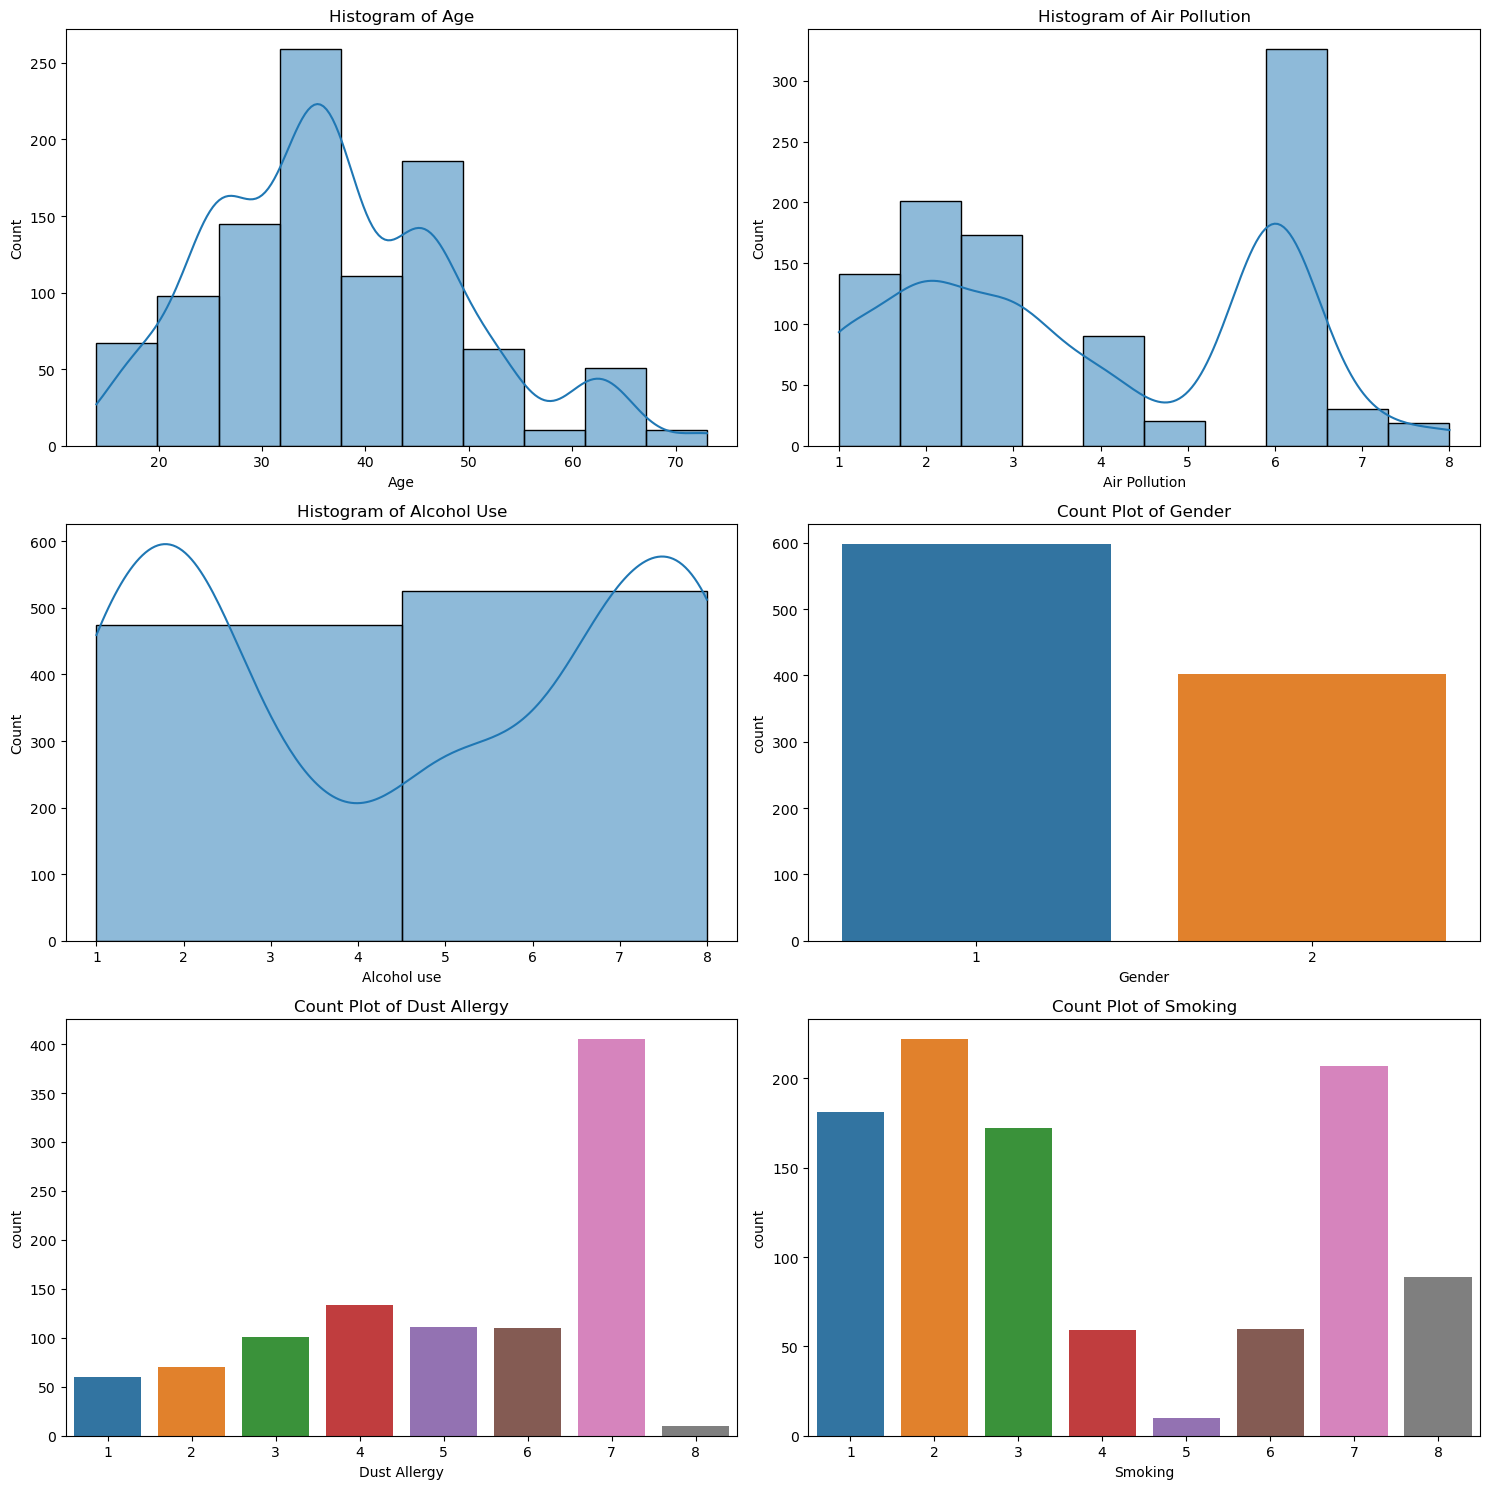

In [64]:
fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Age')
sns.histplot(df['Air Pollution'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Air Pollution')
sns.histplot(df['Alcohol use'], bins=2, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Alcohol Use')
sns.countplot(x='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count Plot of Gender')
sns.countplot(x='Dust Allergy', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Count Plot of Dust Allergy')
sns.countplot(x='Smoking', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Count Plot of Smoking')
plt.tight_layout()
plt.show()

****
## Data Preprocessing ##
****

In [65]:
# Dropping Unwanted columns
col=['index','Patient Id']
df.drop(columns=col,inplace=True,axis=1)

In [66]:
#Encoding target column
df['Level']=df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

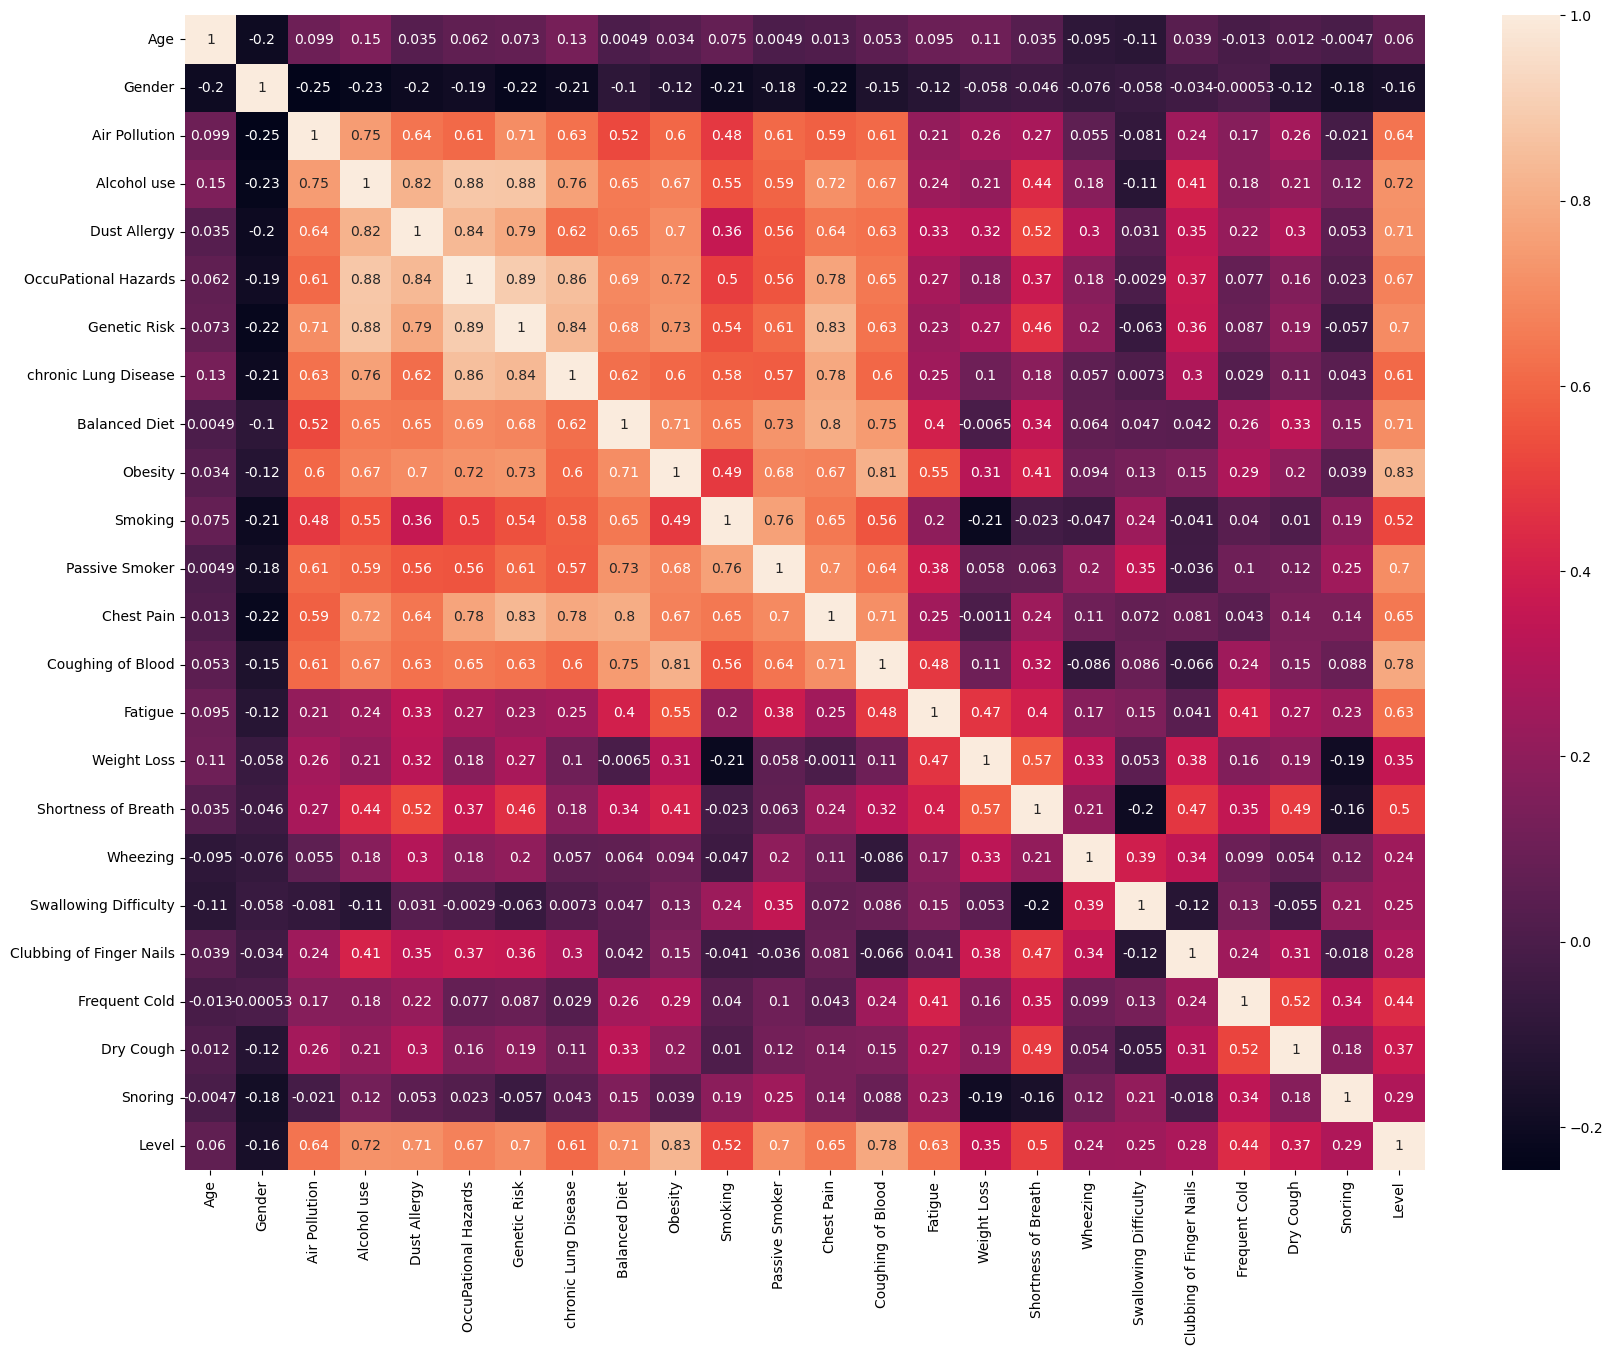

In [68]:
# Finding correlation between features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cbar='magma')
plt.show()

In [69]:
# Splitting the Target column from the original dataset
x=df.drop(columns='Level')
y=df['Level']

# Calculating Mutual Information for capturing both linear and non-linear relationship
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                     Feature  Mutual Information
0                    Obesity            0.510985
1             Passive Smoker            0.487892
2          Coughing of Blood            0.463382
3               Dust Allergy            0.393358
4               Genetic Risk            0.387805
5              Balanced Diet            0.364831
6       OccuPational Hazards            0.357754
7                   Wheezing            0.325404
8       chronic Lung Disease            0.309879
9                    Fatigue            0.305468
10                Chest Pain            0.302010
11               Alcohol use            0.297655
12             Air Pollution            0.251788
13                   Smoking            0.206728
14       Shortness of Breath            0.181350
15                 Dry Cough            0.155490
16             Frequent Cold            0.154028
17               Weight Loss            0.113349
18                   Snoring            0.107098
19  Clubbing of Fing

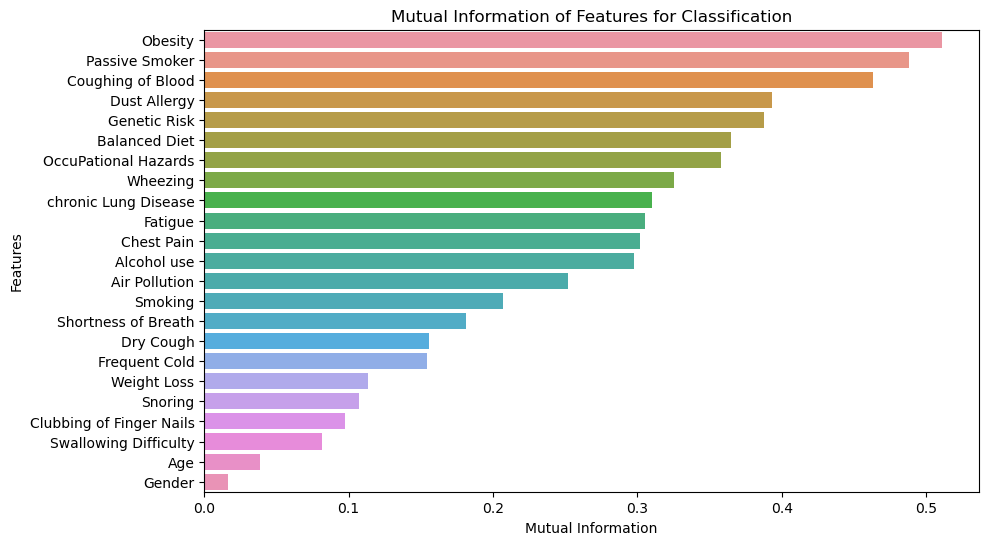

In [70]:
#Plotting Mutual Information for better understanding
plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [71]:
# Drop features with an MI score below 0.05.
col=['Age','Swallowing Difficulty','Gender','Clubbing of Finger Nails']
df.drop(columns=col,inplace=True,axis=1)

In [72]:
df.columns

Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
       'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood',
       'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [73]:
# Splitting the data into Training (75%) and Testing (25%)
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.20, random_state=17)

****
## Models ##
****

## [Decision Tree]

In [74]:
#Fit Train Data
model1 = DecisionTreeClassifier(max_depth=25)
model1.fit(x_t, y_t)

DecisionTreeClassifier(max_depth=25)

In [75]:
#Train accuracy
Y_prd1_train = model1.predict(x_t)
print("Train accuracy:",accuracy_score(y_t,Y_prd1_train)*100)

Train accuracy: 100.0


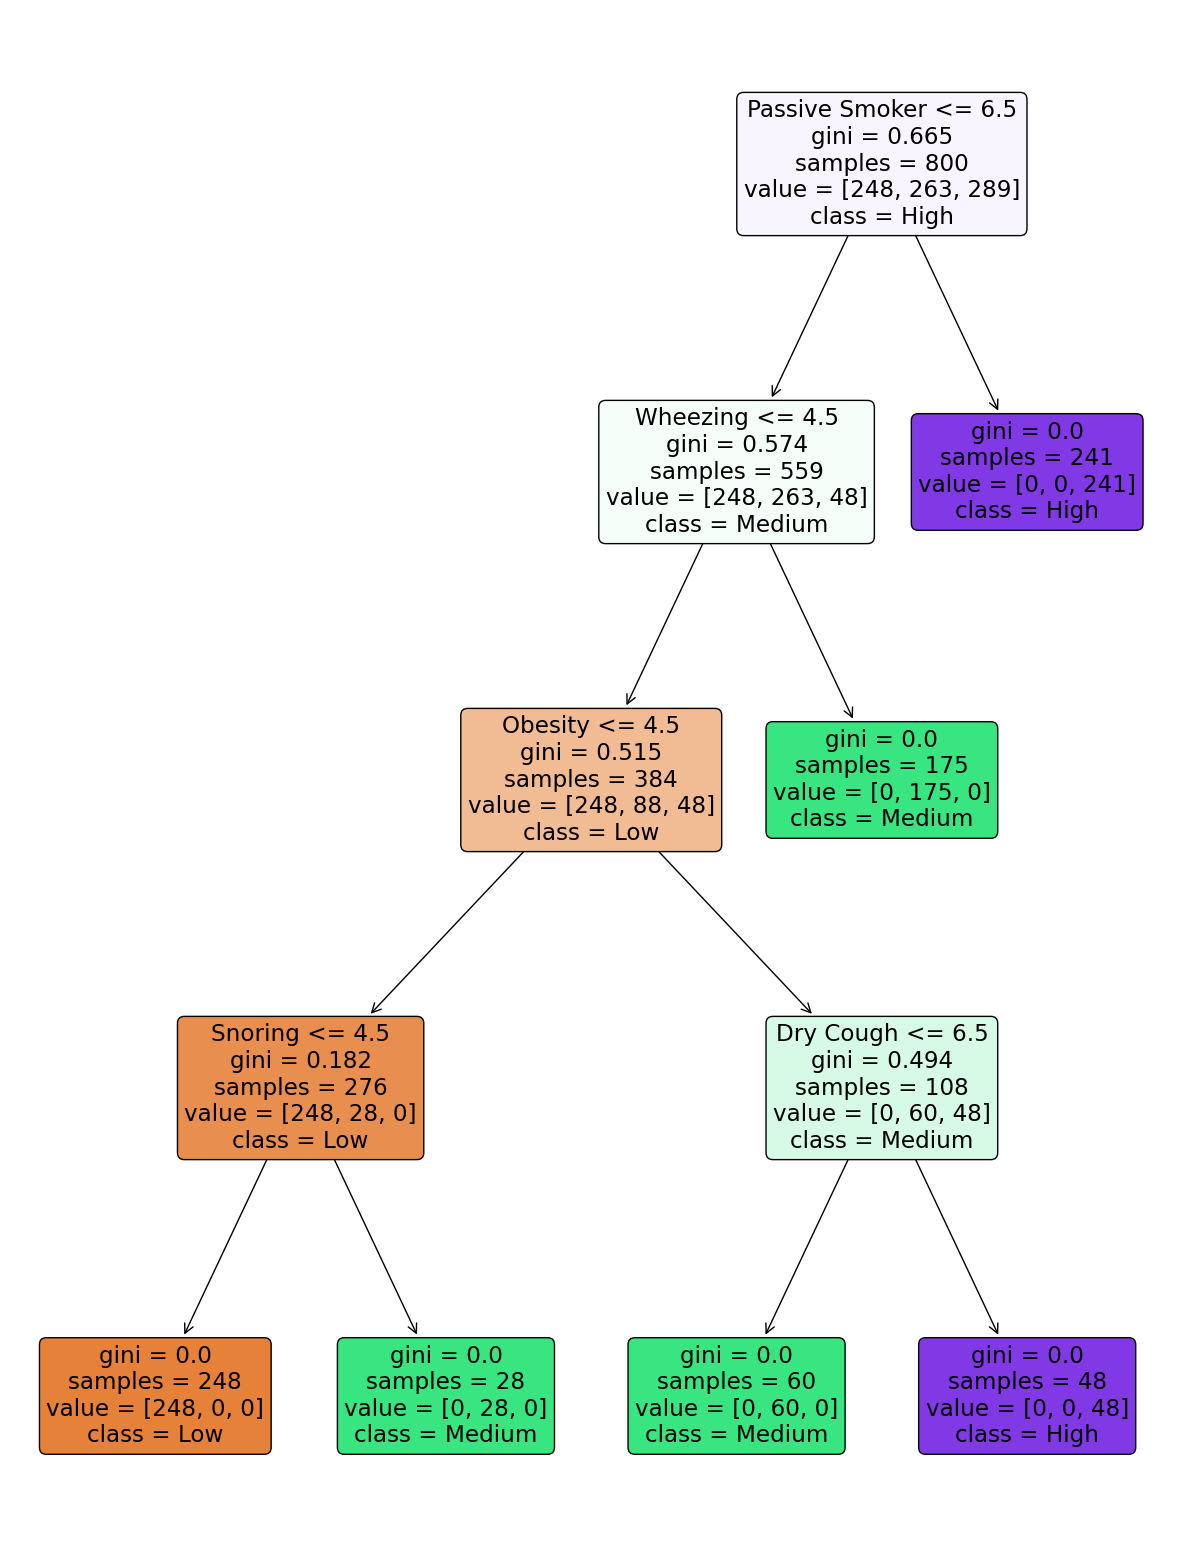

In [86]:
plt.figure(figsize=(15, 20))
plot_tree(
    model1,
    filled=True,
    feature_names=list(x_t.columns),  # Convert to a list here
    class_names=['Low', 'Medium', 'High'],
    rounded=True
)
plt.show()


In [78]:
#Test accuracy and classification report
Y_prd1 = model1.predict(x_te)
print(classification_report(y_te,Y_prd1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Text(0.5, 1.0, 'Decision Tree')

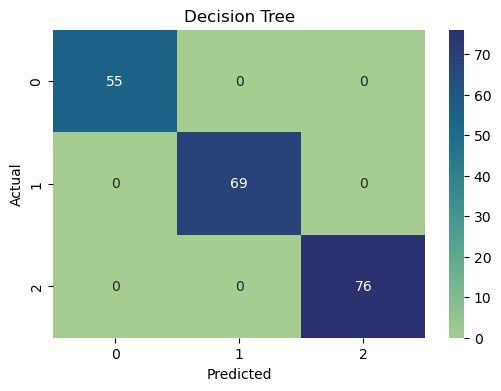

In [79]:
#confusion matrix
cm=confusion_matrix(y_te, Y_prd1)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="crest")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Decision Tree")

In [87]:
# Save the trained model with pickle
import pickle
pickle.dump(model1, open('lung.pkl', 'wb'))